In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 12
import urllib.request as ur
import string

In [6]:

diggy = string.digits + '-.'

def strippy_strip(s):
    ii = None
    for (i, c) in enumerate(s):
        if c not in diggy:
            ii = i
            break
    if ii:
        return s[:ii]
    else:
        return s


def clean(s):
    val = strippy_strip(s.strip())
    return float(val)
    

def opa(n):
    if n.startswith('http'):
        return ur.urlopen(n)
    else:
        return open(n, 'rb')

def plot_dcm(flnm):
    logs = {
        'dt': [],
        'yaw': [],
        'pitch': [],
        'roll': []
    }
    freq = None
    t = 0
    with opa(flnm) as f:
        for line in f:
            line = line.decode('latin-1')
            if 'typr' not in line:
                continue
            try:
                parts = line.split(',')
                if len(parts) < 5:
                    continue
                (dt, yaw, pitch, roll) = tuple(map(clean, parts[1:]))     
                logs['dt'].append(dt)
                logs['yaw'].append(yaw)
                logs['pitch'].append(pitch)
                logs['roll'].append(roll)
            except Exception as e:
                print('lol, err: {}'.format(e))

    ts = list(np.cumsum(logs['dt']))
    f, axarr = plt.subplots(3, sharex=True)
    m = min(len(v) for v in logs.values())
    axarr[0].plot(ts[:m], np.degrees(logs['yaw'][:m]), 'b')
    axarr[1].plot(ts[:m], np.degrees(logs['pitch'][:m]), 'g')
    axarr[2].plot(ts[:m], np.degrees(logs['roll'][:m]), 'r')
    axarr[0].set_title('yaw')
    axarr[1].set_title('pitch')
    axarr[2].set_title('roll')

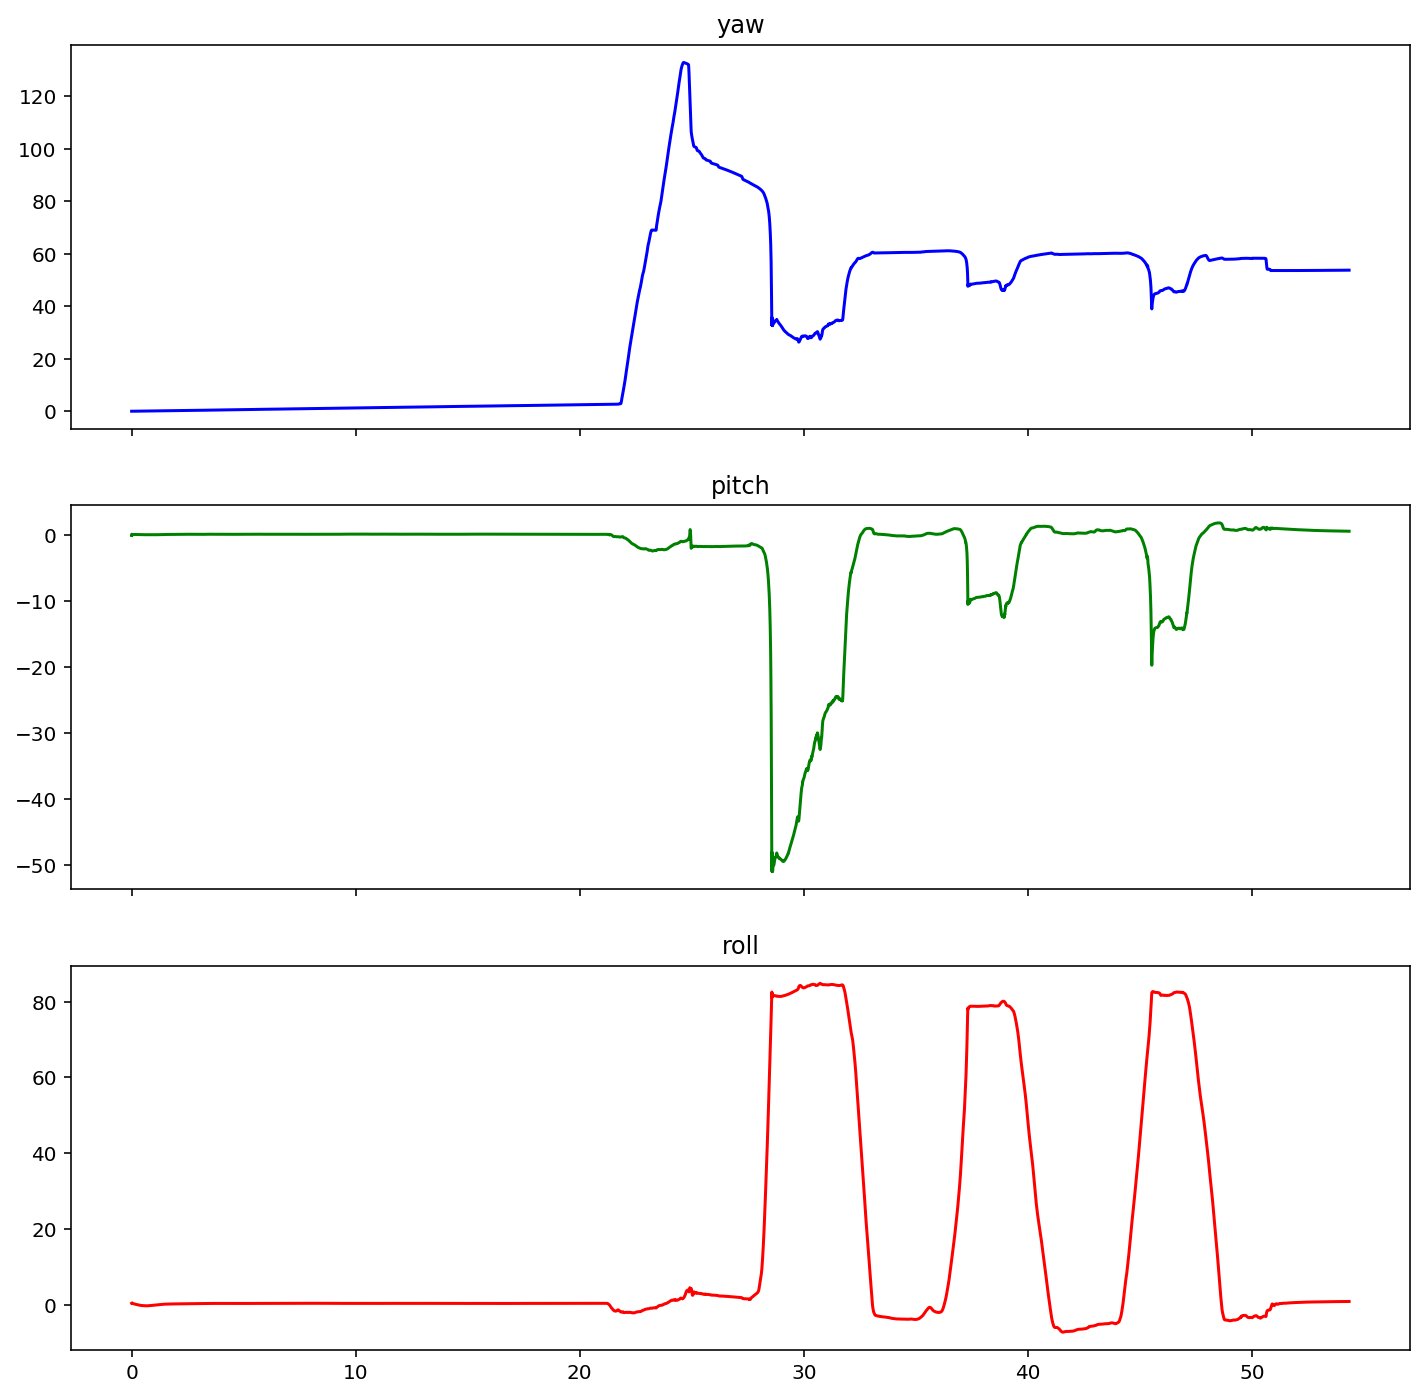

In [7]:
plot_dcm('hopefully_good.txt') 

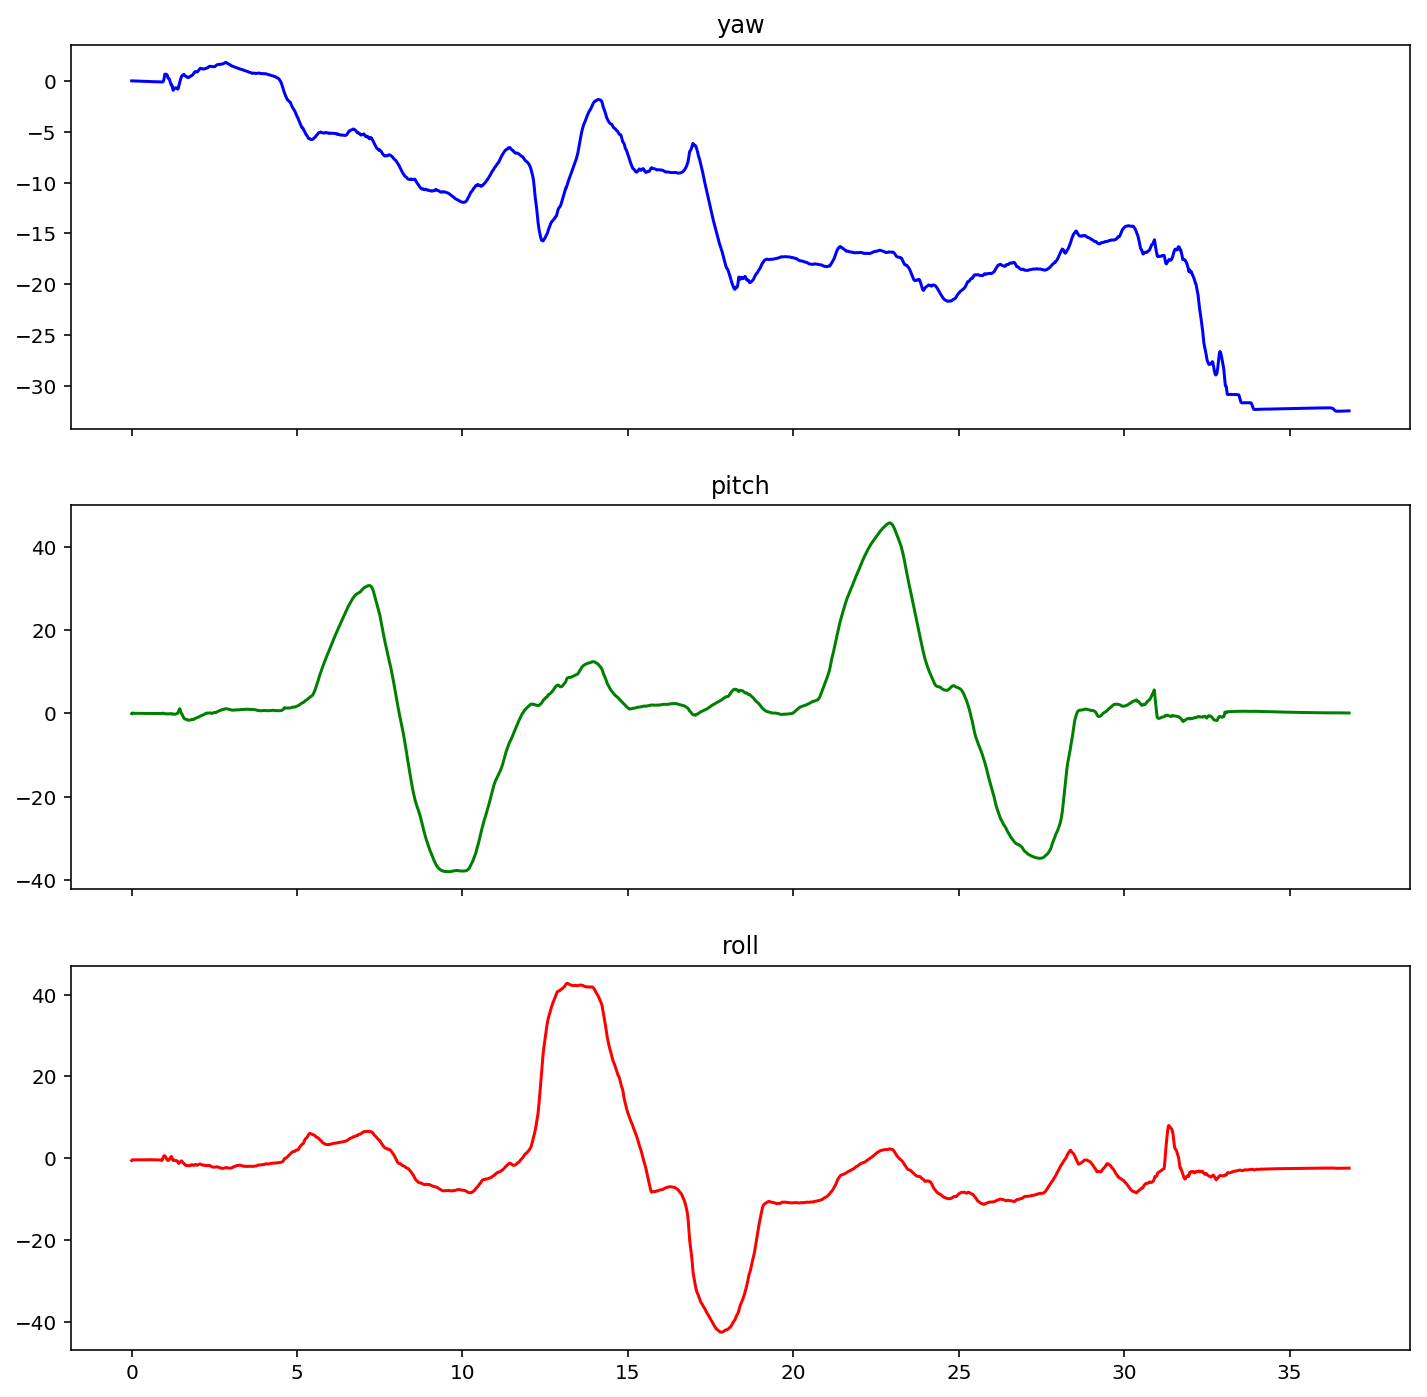

In [8]:
plot_dcm('flyght.txt') 

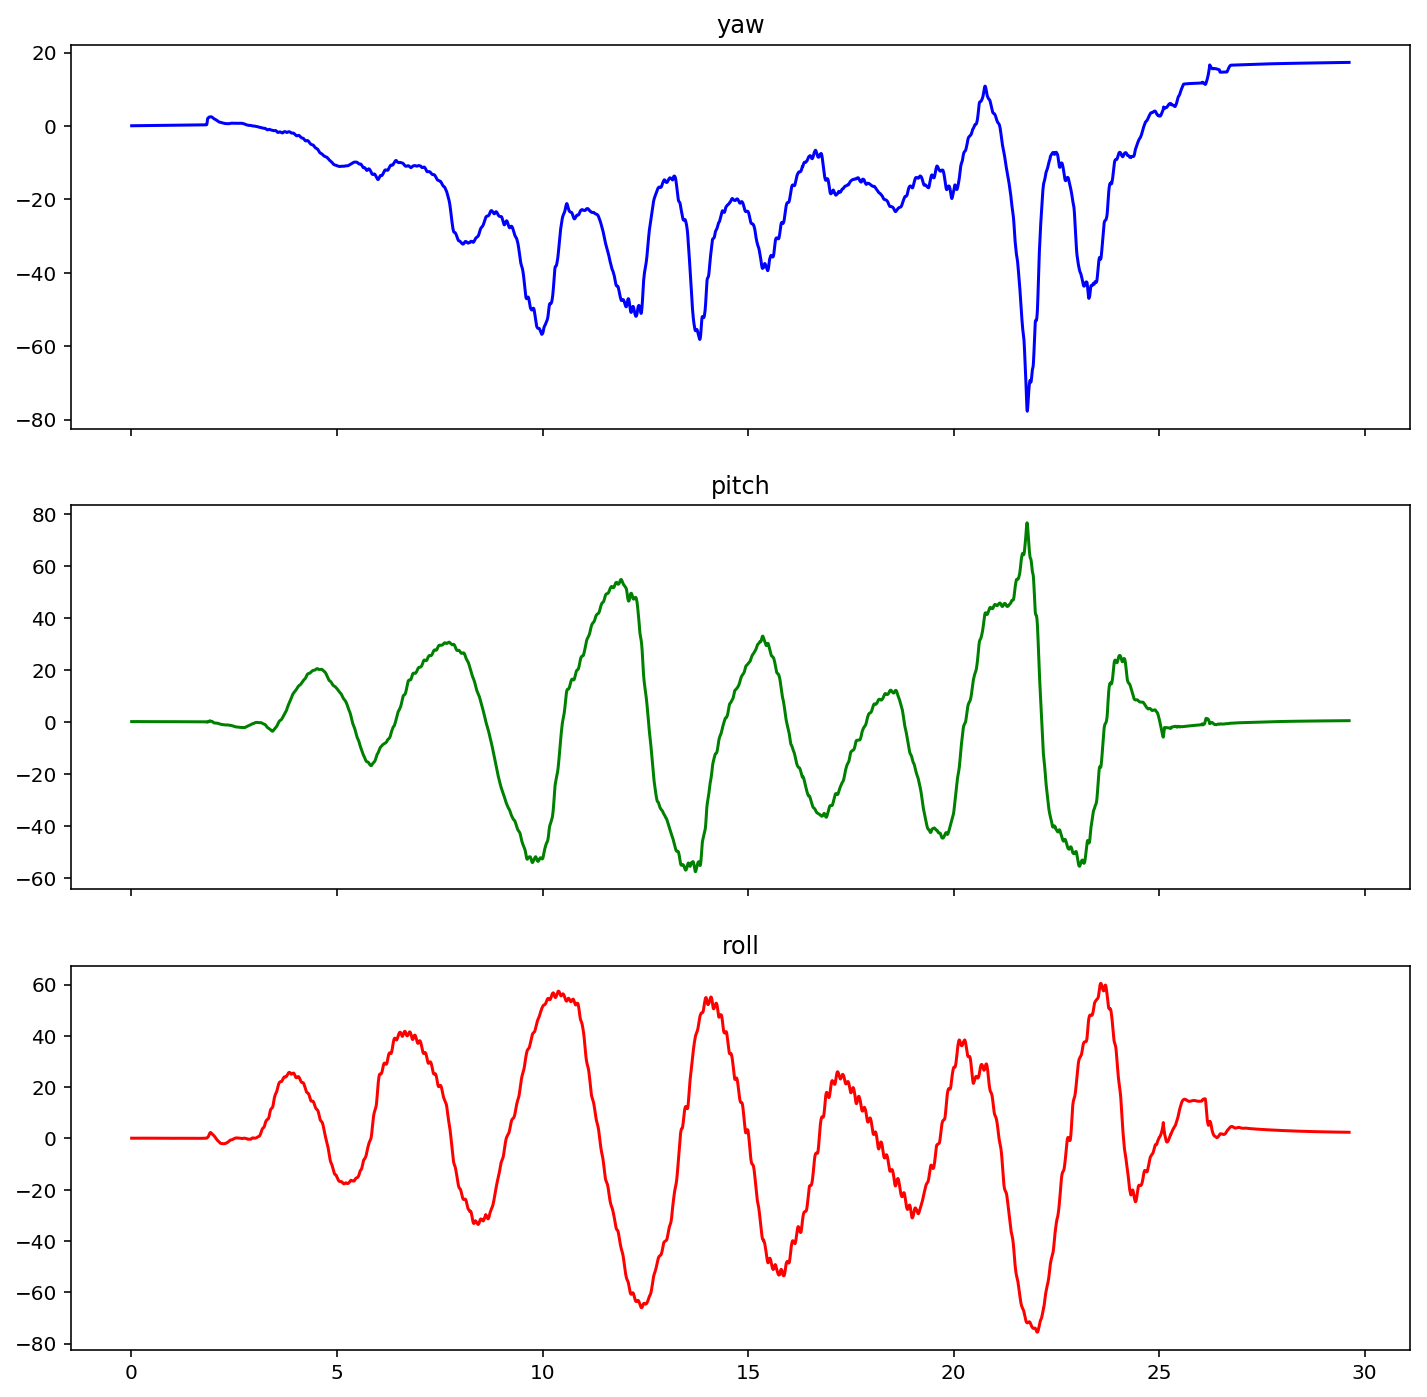

In [9]:
plot_dcm('surovo.txt') 

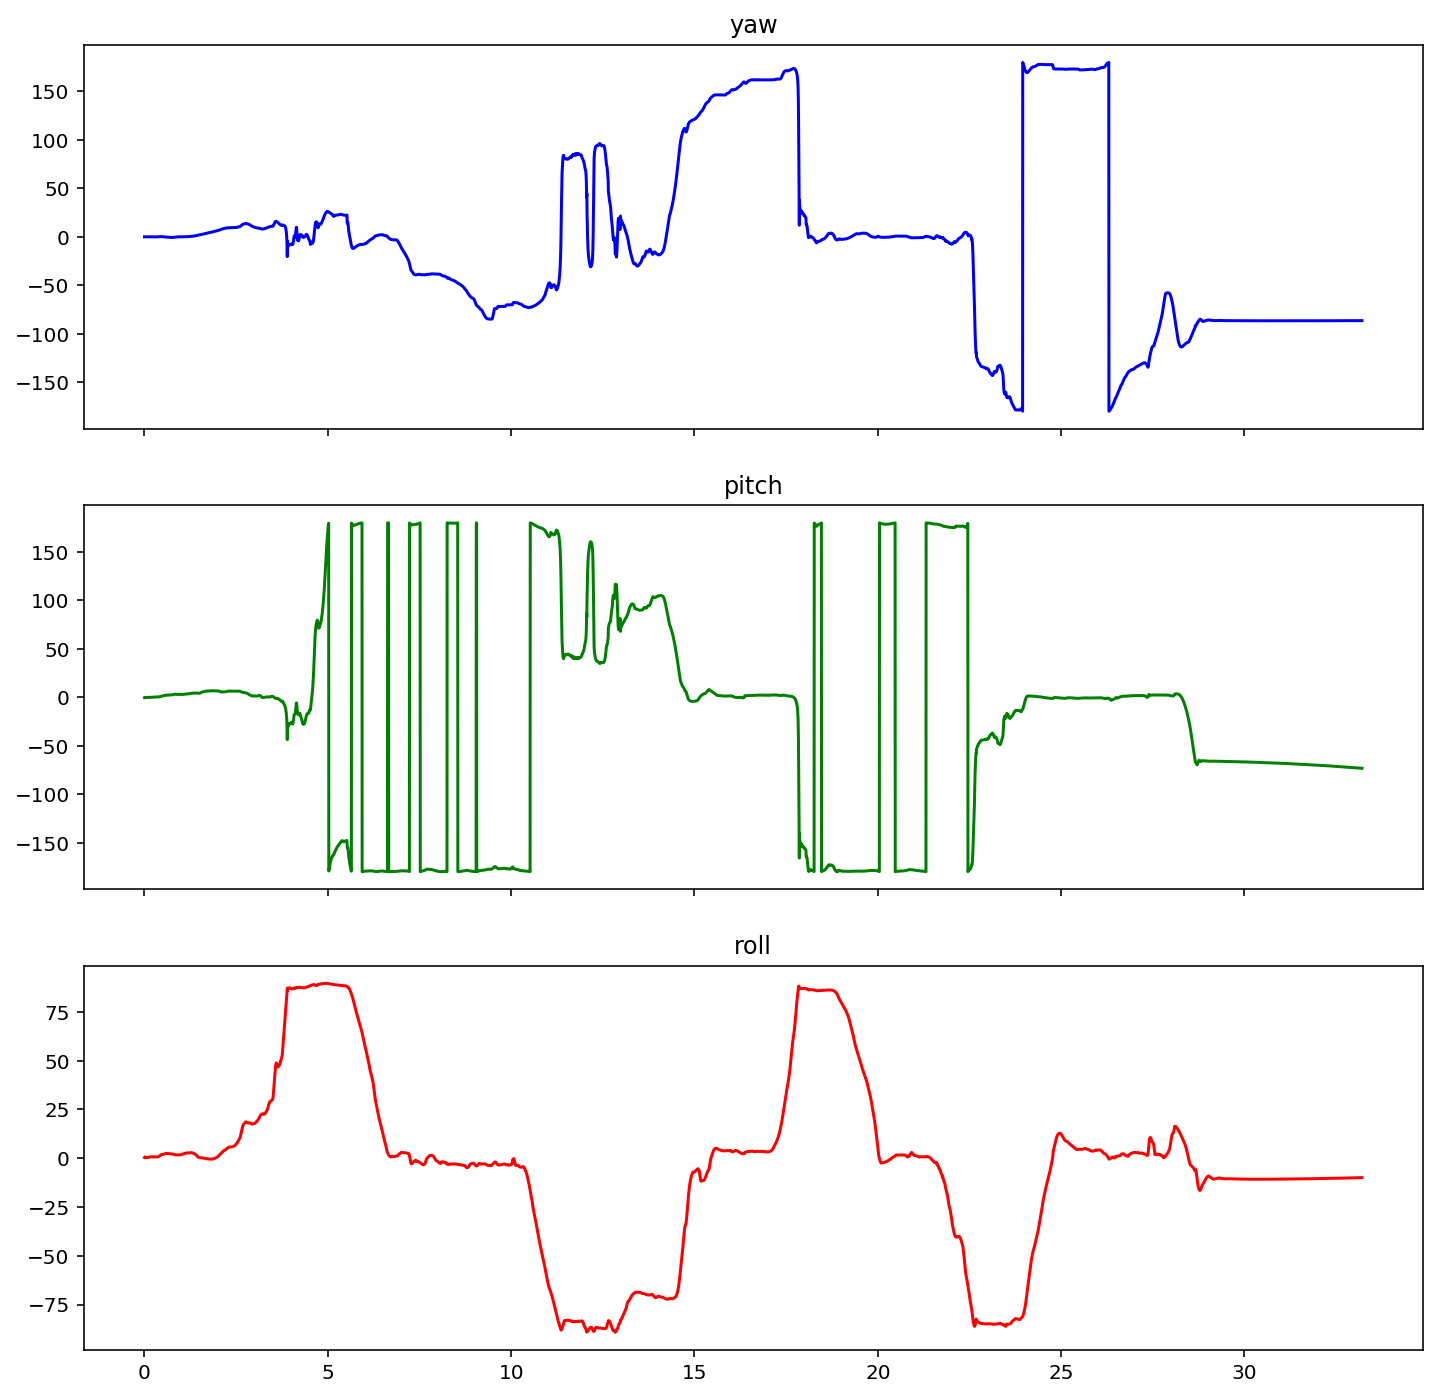

In [10]:
plot_dcm('full.txt')

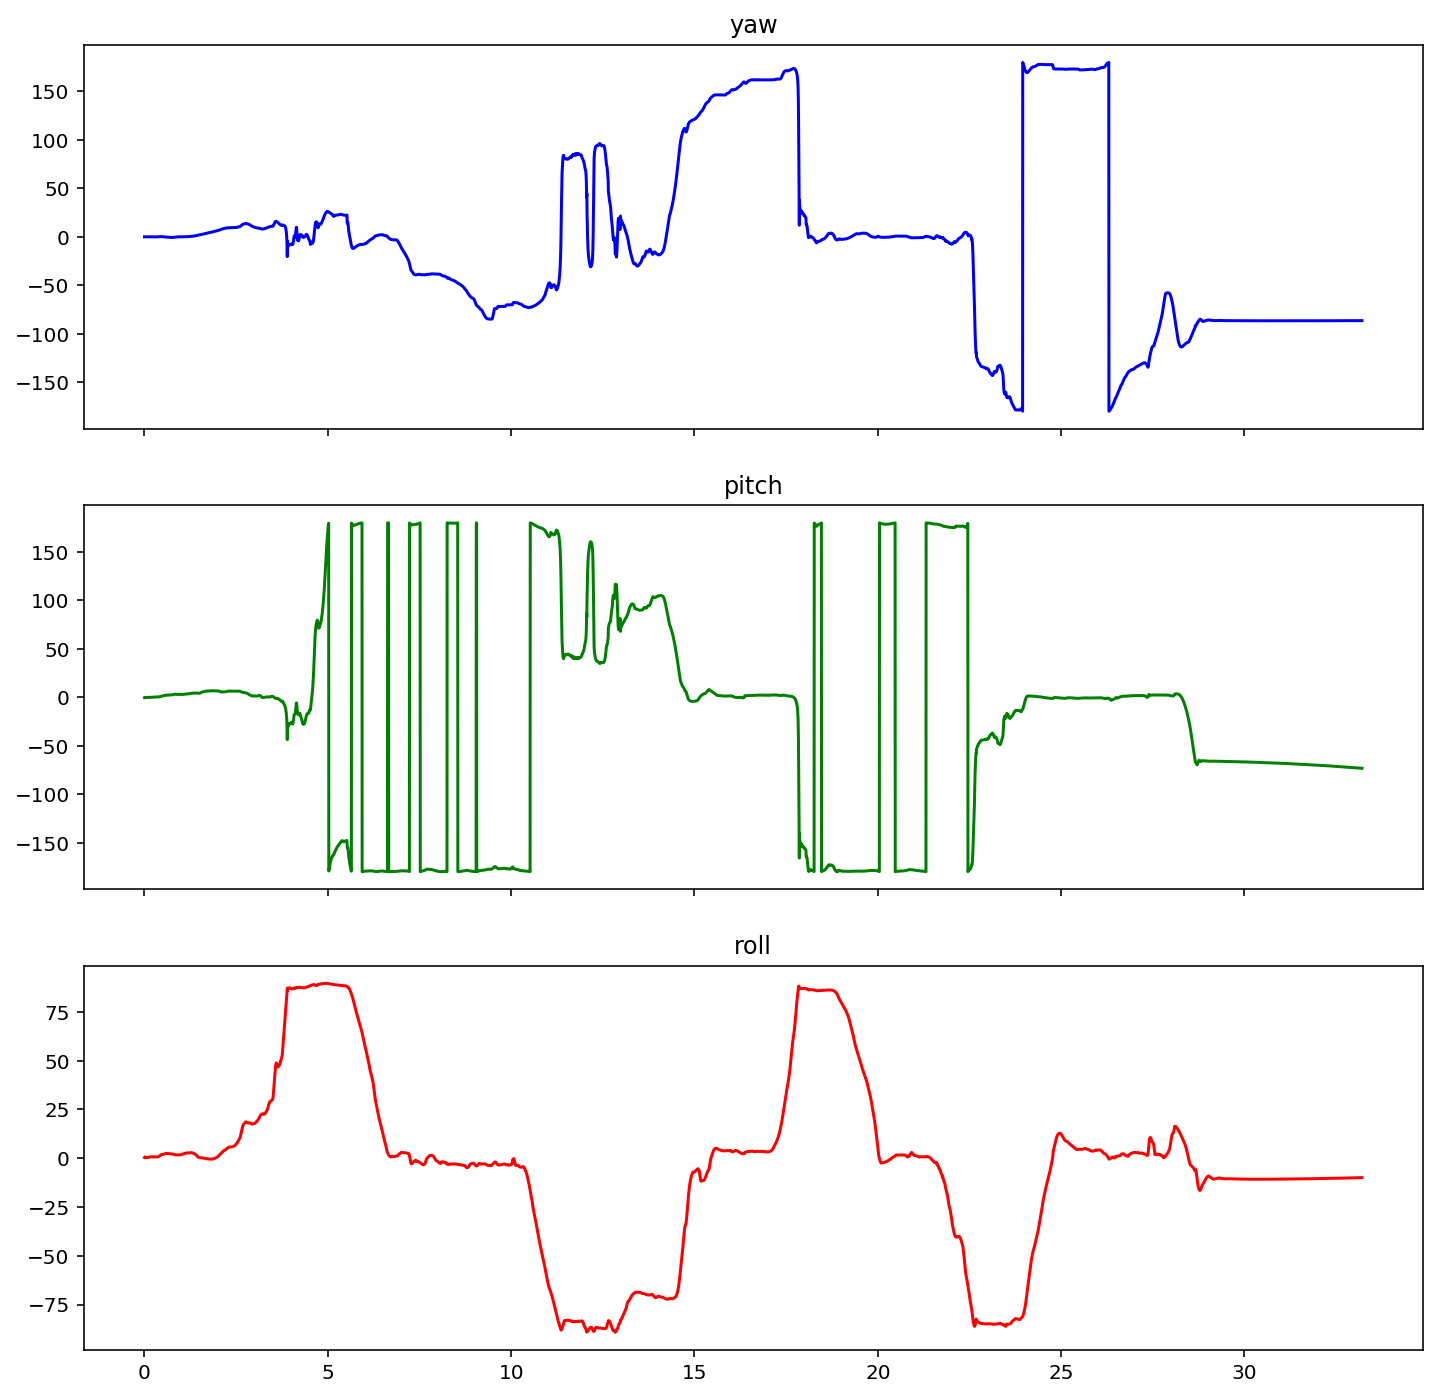

In [11]:
plot_dcm("https://gist.githubusercontent.com/little-arhat/dd70395e10e29dc8368f55fbce2d3eaf/raw/c1fc7f66d0c6a2acfc55df4ef386038d26ba1989/full.txt")

lol, err: could not convert string to float: '\x03\x050.005'
lol, err: too many values to unpack (expected 4)
lol, err: too many values to unpack (expected 4)
lol, err: too many values to unpack (expected 4)
lol, err: too many values to unpack (expected 4)


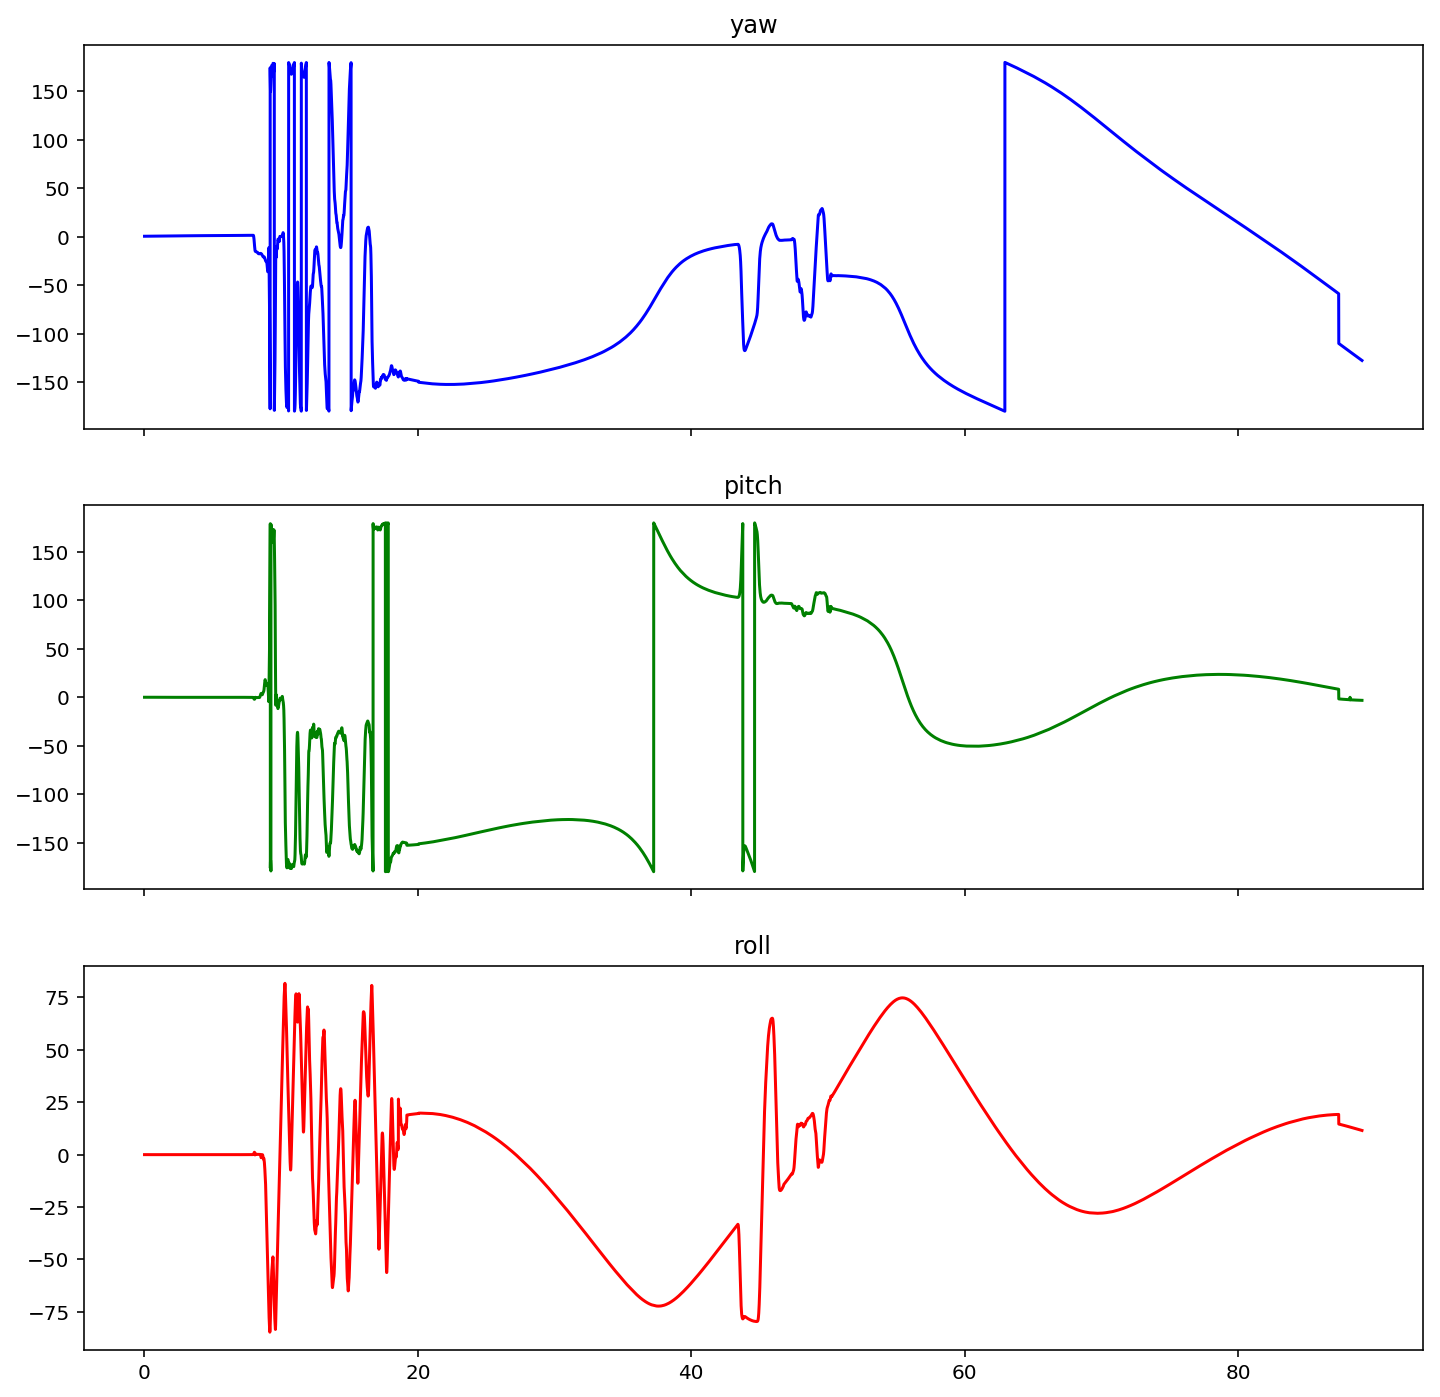

In [12]:
plot_dcm('verevochki.txt')

lol, err: too many values to unpack (expected 4)
lol, err: too many values to unpack (expected 4)


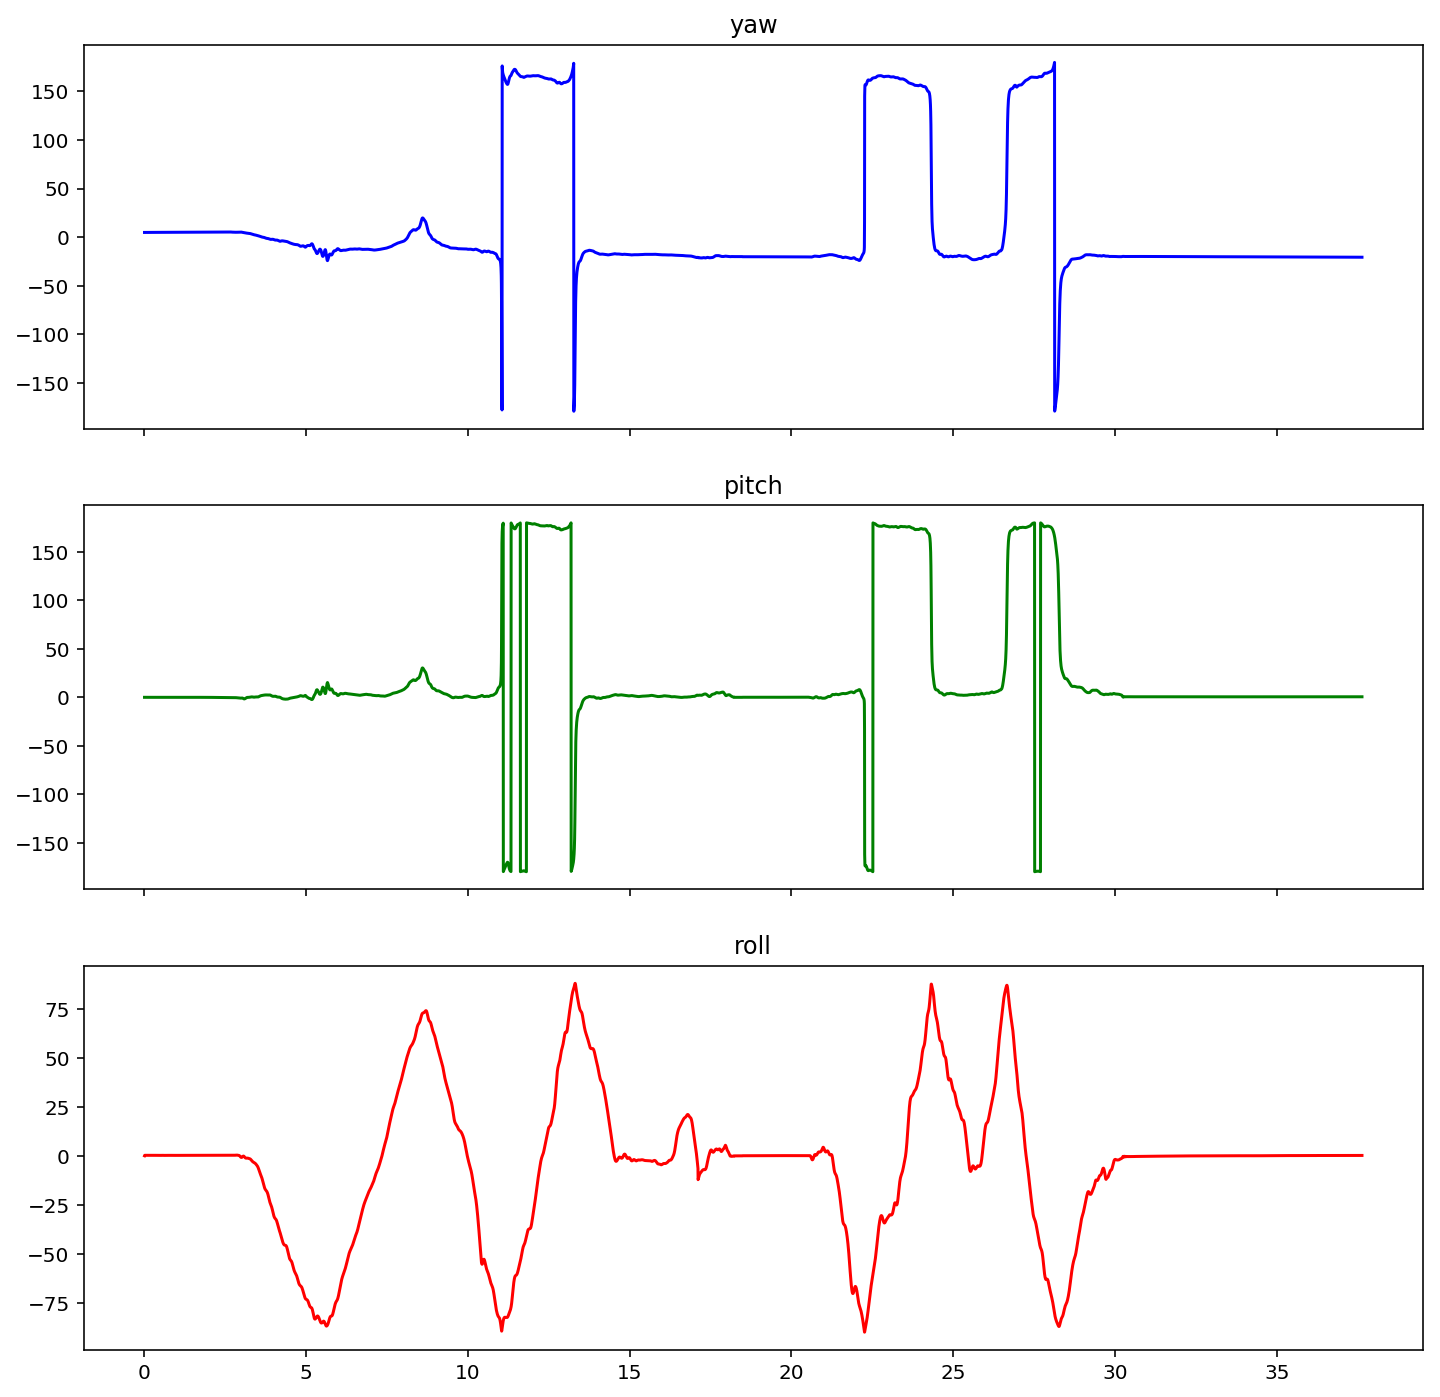

In [13]:
plot_dcm('akkuratno.txt')